## Model Test

In [2]:
import torch
import torchvision.transforms as transforms               
from torchvision.datasets import CIFAR10       
from torch.utils.data import DataLoader
import detectors
import timm
from src.temperature_scaling import ModelWithTemperature
from src.cifar10h import aps_cifar10h_hist, raps_cifar10h_hist, saps_cifar10h_hist, aps_cifar10h_scatter, raps_cifar10h_scatter, saps_cifar10h_scatter


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# load fine-tuned model
model = timm.create_model("resnet18_cifar10", pretrained=True)
model.to(device)

# reprocess the images from CIFAR10
data_transform = transforms.Compose([
    transforms.ToTensor(),          # transfer to tensor
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])  # normalize
])
# load images from CIFAR10
dataset = CIFAR10(root="../data", train=False, download=True, transform=data_transform)

# Temperature Scaling
temp_scal_loader = DataLoader(dataset, batch_size=32, shuffle=True)
model = ModelWithTemperature(model, temperature=5.0).to(device)
model.set_temperature(temp_scal_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.1

Files already downloaded and verified
Before temperature - NLL: 0.307, ECE: 0.041
Optimal temperature: 4.904
After temperature - NLL: 0.870, ECE: 0.460


APS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4832 ± 0.0024
Final Average Prediction Set Size: 1.26 ± 0.02
Final Average Coverage: 0.8963 ± 0.0051
Final Average Real Probability: 0.8680 ± 0.0051


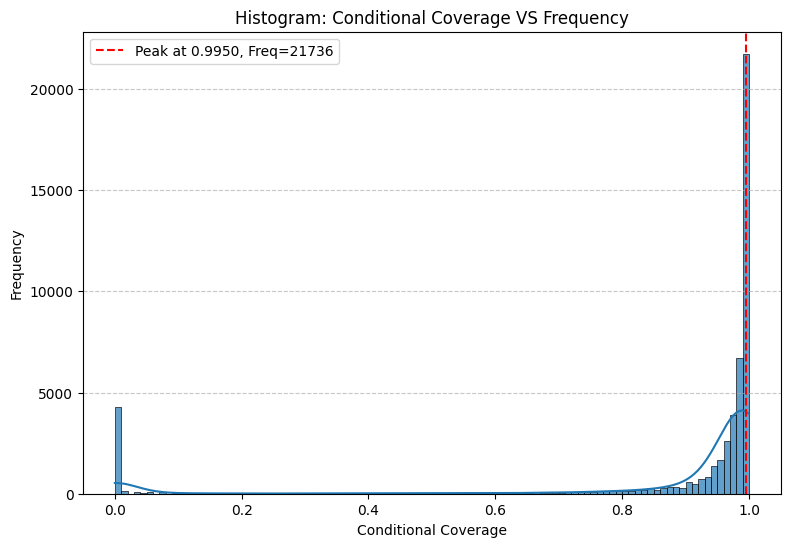

21736 (43.47%) samples reached the peak conditional coverage at 0.9950


In [3]:
aps_cifar10h_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

APS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4816 ± 0.0021
Final Average Prediction Set Size: 1.27 ± 0.01
Final Average Coverage: 0.8957 ± 0.0042
Final Average Real Probability: 0.8675 ± 0.0042


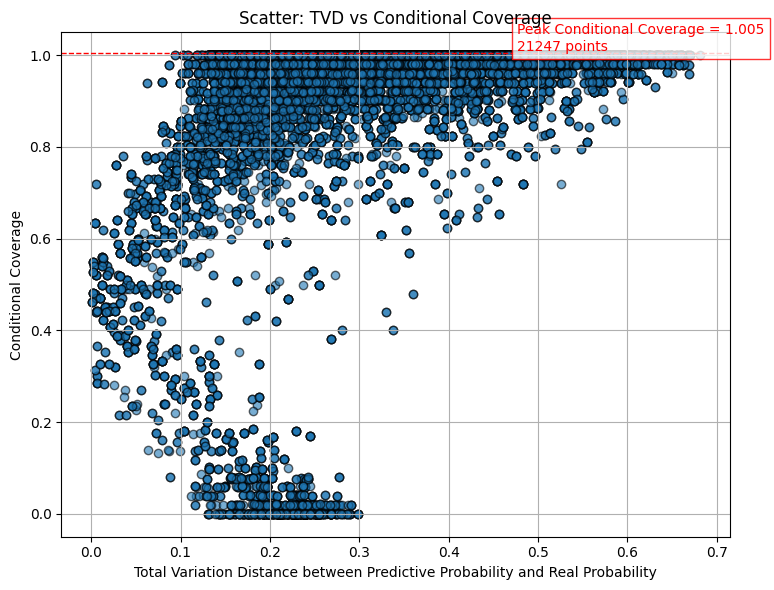

Peak Conditional Coverage = 1.005, with 21247 samples

=== Count Regions Summary ===
40115 (80.2%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
1679 (3.4%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
3080 (6.2%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.62978']
  Real Probability Set      : ['0.82353']
Sample 2:
  Predictive Probability Set: ['0.62978']
  Real Probability Set      : ['0.82353']
Sample 3:
  Predictive Probability Set: ['0.68579']
  Real Probability Set      : ['0.84615']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.27714', '0.19477']
  Real Probability Set      : ['0.02000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.14972', '0.13921', '0.13226', '0.10040']
  Real Probability Set      : ['0.01852', '0.00000', '0.00000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.46537',

In [4]:
aps_cifar10h_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5004 ± 0.0019
Final Average Prediction Set Size: 1.05 ± 0.01
Final Average Coverage: 0.8964 ± 0.0037
Final Average Real Probability: 0.8655 ± 0.0039


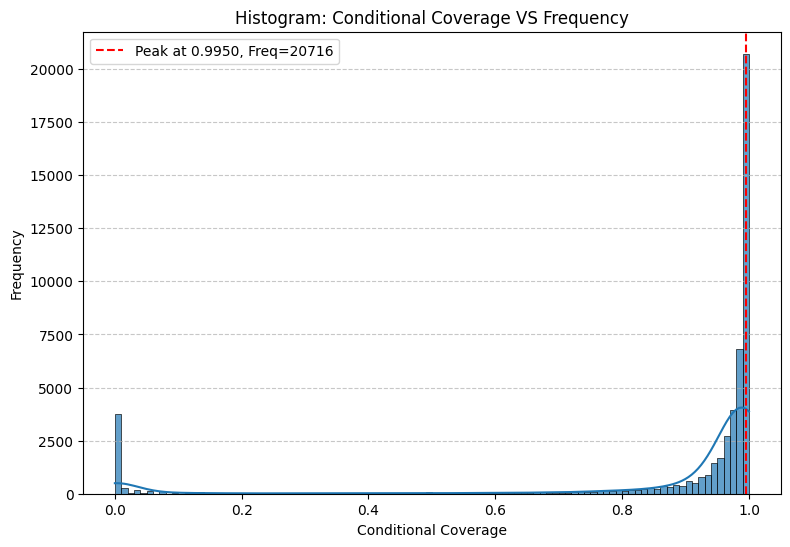

20716 (41.43%) samples reached the peak conditional coverage at 0.9950


In [4]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.1, k_reg=1, num_runs=10, alpha=0.1, is_ground_truth=False)

RAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4996 ± 0.0027
Final Average Prediction Set Size: 1.06 ± 0.01
Final Average Coverage: 0.8958 ± 0.0044
Final Average Real Probability: 0.8649 ± 0.0048


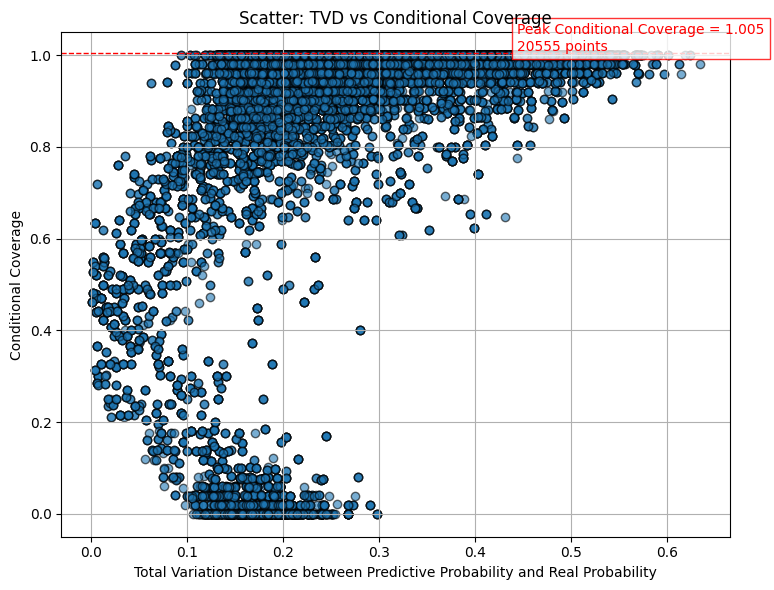

Peak Conditional Coverage = 1.005, with 20555 samples

=== Count Regions Summary ===
41852 (83.7%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
532 (1.1%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
4276 (8.6%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.64101']
  Real Probability Set      : ['0.80769']
Sample 2:
  Predictive Probability Set: ['0.65433']
  Real Probability Set      : ['0.83019']
Sample 3:
  Predictive Probability Set: ['0.74072']
  Real Probability Set      : ['0.94000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.48123']
  Real Probability Set      : ['0.00000']
Sample 2:
  Predictive Probability Set: ['0.42661']
  Real Probability Set      : ['0.00000']
Sample 3:
  Predictive Probability Set: ['0.65864']
  Real Probability Set      : ['0.16981']

--- Region 3: medium TVD, medium Coverage ---

In [5]:
raps_cifar10h_scatter(model,dataset,device, lambda_=0.1, k_reg=1, num_runs=10, alpha=0.1)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5298 ± 0.0043
Final Average Prediction Set Size: 0.99 ± 0.01
Final Average Coverage: 0.8989 ± 0.0063
Final Average Real Probability: 0.8674 ± 0.0064


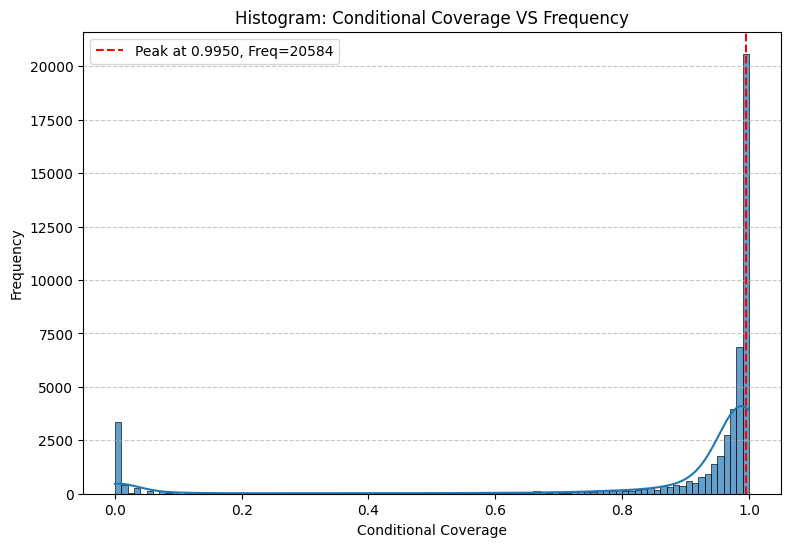

20584 (41.17%) samples reached the peak conditional coverage at 0.9950


In [3]:
saps_cifar10h_hist(model, dataset, device, lambda_=2.2, num_runs=10, alpha=0.1, is_ground_truth=False)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5242 ± 0.0041
Final Average Prediction Set Size: 0.99 ± 0.01
Final Average Coverage: 0.8975 ± 0.0066
Final Average Real Probability: 0.8664 ± 0.0069


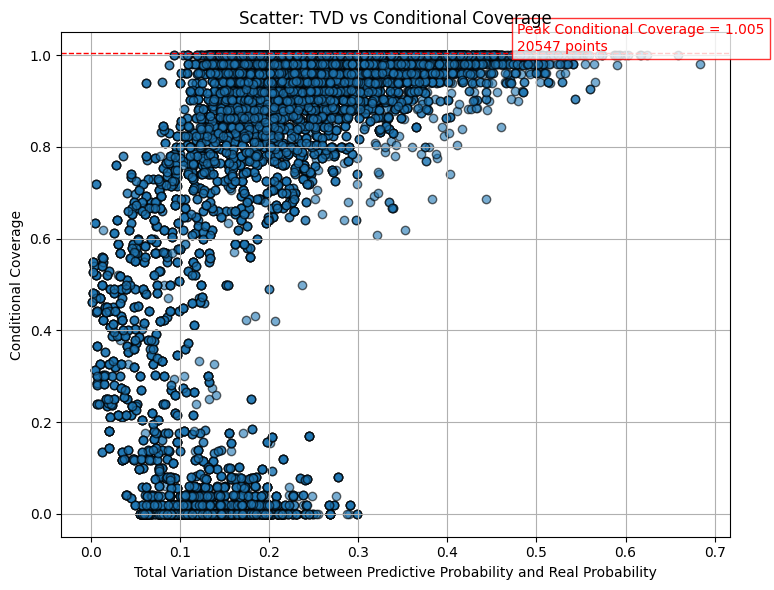

Peak Conditional Coverage = 1.005, with 20547 samples

=== Count Regions Summary ===
42582 (85.2%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
86 (0.2%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
5284 (10.6%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.68579']
  Real Probability Set      : ['0.84615']
Sample 2:
  Predictive Probability Set: ['0.64666']
  Real Probability Set      : ['0.84615']
Sample 3:
  Predictive Probability Set: ['0.60863']
  Real Probability Set      : ['0.80000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.50182']
  Real Probability Set      : ['0.02000']
Sample 2:
  Predictive Probability Set: ['0.51537']
  Real Probability Set      : ['0.04000']
Sample 3:
  Predictive Probability Set: ['0.42954', '0.14397']
  Real Probability Set      : ['0.00000', '0.00000']

--- Region 3: medium TV

In [6]:
saps_cifar10h_scatter(model, dataset, device, lambda_=2.2, num_runs=10, alpha=0.1)